In [2]:
# first part
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# import scipy.stats as stats
import seaborn as sns

# Define constants for the probability distribution function
E5 = 41/99
E6 = 3
E7 = 58/99
E8 = 7

# Define a function that returns the value of the probability distribution function for a given y
def probabilityDistribution(y):
 # Use the numpy exp function to calculate the exponential terms
 return E5 * np.exp(-E6 * (y ** 2)) + (E7 * np.exp(-E8 * (y ** 2)))

# Calculate the probability of y being between 2 and 4 by subtracting the probabilities of y being less than 2 or greater than 4
probability_2_4 = 1 - probabilityDistribution(4) - (1 - probabilityDistribution(2))

# Print the result
print(probability_2_4)


2.5445731979267805e-06


In [1]:
# second part
# Define a function that returns the value of a probability density function for a given y
def pdf(y):
 # Use the numpy exp function to calculate the exponential terms
 return (((E5) * y * np.exp(-E6 * (y ** 2))) + ((E7) * y * np.exp(-E8* (y**2))))

# Define a function that returns the probability of y being between x and y using the probability distribution function
def histProbabilities(x, y):
 # Use the complement rule to calculate the probability
 return 1 - probabilityDistribution(y) - (1 - probabilityDistribution(x))

# Define the start and end hours of the interval
hourStart = 0
hourEnd = 7
# Define the number of minutes in the interval
numMinutes = 7 * 60

# Create an array of minutes from hourStart to hourEnd with numMinutes elements
minutes = np.linspace(start=hourStart, stop=hourEnd, num=numMinutes)
# Create an empty list to store the histogram probabilities for each minute interval
hist_values = []
# Loop through the minutes array except the last element
for i in range(len(minutes[:numMinutes-1])):
    # Append the histogram probability for the current minute interval to the list
    hist_values.append(histProbabilities(minutes[i], minutes[i+1]))

NameError: name 'np' is not defined

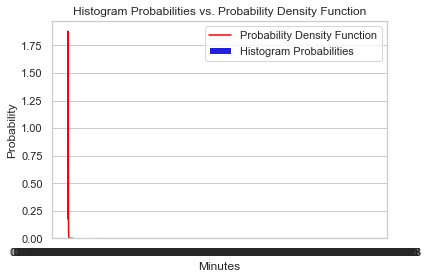

In [25]:



# change each hist_values to abs values
for i in range(len(hist_values)):
    hist_values[i] = abs(hist_values[i])


# Create an empty list to store the probability density function values for each minute
pdf_values = []
# Loop through the minutes array except the first element
for i in range(len(minutes)-1):
 # Append the probability density function value for the current minute to the list
 pdf_values.append(pdf(minutes[i+1]))


# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and color palette of seaborn
sns.set_style('whitegrid')
sns.set_palette('muted')

# Plot the histogram probabilities using seaborn barplot
sns.barplot(x=minutes[:numMinutes-1], y=hist_values, color='blue', label='Histogram Probabilities')
# Plot the probability density function values using matplotlib plot
plt.plot(minutes[1:], pdf_values, color='red', label='Probability Density Function')
# Set the x-axis label
plt.xlabel('Minutes')
# Set the y-axis label
plt.ylabel('Probability')
# Set the title
plt.title('Histogram Probabilities vs. Probability Density Function')
# Display the legend
plt.legend()
# Display the plot
plt.show()



In [15]:
# part one
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Define constants for the probability distribution function
E5 = 41/99
E6 = 3
E7 = 58/99
E8 = 7

# Define a function that returns the value of the probability distribution function for a given y
def probabilityDistribution(y):
    # Use the numpy exp function to calculate the exponential terms
    return E5 * np.exp(-E6 * (y ** 2)) + (E7 * np.exp(-E8 * (y ** 2)))

# Calculate the probability of y being between 2 and 4 by subtracting the probabilities of y being less than 2 or greater than 4
probability_2_4 = 1 - probabilityDistribution(4) - (1 - probabilityDistribution(2))

# Print the result
print(probability_2_4)

# Define the start and end hours of the interval
hourStart = 0
hourEnd = 7
# Define the number of minutes in the interval
numMinutes = 7 * 60
# Create an array of minutes from hourStart to hourEnd with numMinutes elements
minutes = np.linspace(start=hourStart, stop=hourEnd, num=numMinutes)

# Define a function that returns the value of a normal probability density function for a given y
def normal_pdf(y):
    return (((82/33) * y * np.exp(-3 * (y ** 2))) + ((812/99) * y * np.exp(-7 * (y**2))))



2.5445731979267805e-06


c:\Users\saket\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


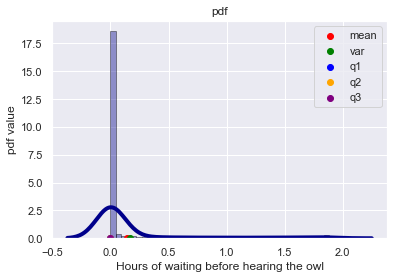

In [26]:
# part two
# Create an empty list to store the probability density function values for each minute
pdf_values = []
# Loop through the minutes array except the first and last elements
for i in range(1, len(minutes)-1):
    # Append the probability density function value for the current minute to the list
    pdf_values.append(normal_pdf(minutes[i]))

# Create an empty list to store the histogram probabilities for each minute interval
hist_values = []
# Loop through the minutes array except the last element
for i in range(len(minutes[:numMinutes-1])):
    # Append the histogram probability for the current minute interval to the list
    hist_values.append(histProbabilities(minutes[i], minutes[i+1]))

# change each hist_values to abs values
for i in range(len(hist_values)):
    hist_values[i] = abs(hist_values[i])

# Calculate the mean, var, q1, q2, q3 as points on the pdf_values
mean = np.mean(pdf_values)
var = np.var(pdf_values)
q1 = np.percentile(pdf_values, 25)
q2 = np.percentile(pdf_values, 50)
q3 = np.percentile(pdf_values, 75)

# Create a figure for the probability density function plot
sns.set()
sns.distplot(pdf_values, hist=True, kde=True,
             bins=int(numMinutes/10), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})
plt.xlabel('Hours of waiting before hearing the owl')
plt.ylabel('pdf value')
plt.title('pdf')

# plot the mean, var, q1, q2, q3 of the pdf_values as points
plt.scatter(mean, 0, color='red', label='mean')
plt.scatter(var, 0, color='green', label='var')
plt.scatter(q1, 0, color='blue', label='q1')
plt.scatter(q2, 0, color='orange', label='q2')
plt.scatter(q3, 0, color='purple', label='q3')
# # Set the y-axis scale/range
# plt.ylim(0, 15)

# # Display the value of the first bar
# plt.text(0.0, 14, "0.39")

# Set the legend location
plt.legend(loc='upper right')

# Display the plot
plt.show()

In [17]:
print(q1, q2, q3)

2.1387458458824513e-35 9.66991698386353e-16 0.0004103775524263761


In [13]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Define constants for the probability distribution function
E_5 = 41/99
E_6 = 3
E_7 = 58/99
E_8 = 7

# Define a function that returns the value of the probability distribution function for a given y
def probabilityDistribution(y):
    # Use the numpy exp function to calculate the exponential terms
    return E_5 * np.exp(-E_6 * (y ** 2)) + (E_7 * np.exp(-E_8 * (y ** 2)))

# Calculate the probability of y being between 2 and 4 by subtracting the probabilities of y being less than 2 or greater than 4
probability_2_4 = 1 - probabilityDistribution(4) - (1 - probabilityDistribution(2))

# Print the result
print(probability_2_4)

# Define the start and end hours of the interval
hourStart = 0
hourEnd = 7
# Define the number of minutes in the interval
numMinutes = 7 * 60
# Create an array of minutes from hourStart to hourEnd with numMinutes elements
minutes = np.linspace(start=hourStart, stop=hourEnd, num=numMinutes)

# Define a function that returns the value of a normal probability density function for a given y
# def normal_pdf(y):
#     # Use the scipy.stats.norm.pdf function to calculate the pdf value
#     return stats.norm.pdf(y, loc=0, scale=1)

def pdf(y):
    # Use the numpy exp function to calculate the exponential terms
    # return (((82/33) * y * np.exp(-3 * (y ** 2))) + ((812/99) * y * np.exp(-7 * (y**2))))
    return stats.norm.pdf(y, loc=0, scale=1)

# Create an empty list to store the probability density function values for each minute
pdf_values = []
# Loop through the minutes array except the first and last elements
for i in range(1, len(minutes)-1):
    # Append the probability density function value for the current minute to the list
    pdf_values.append(normal_pdf(minutes[i]))

# Calculate the mean, var, q1, q2, q3 as points on the pdf_values
mean = np.mean(pdf_values)
var = np.var(pdf_values)
q1 = np.percentile(pdf_values, 25)
q2 = np.percentile(pdf_values, 50)
q3 = np.percentile(pdf_values, 75)



2.5445731979267805e-06


NameError: name 'normal_pdf' is not defined

c:\Users\saket\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


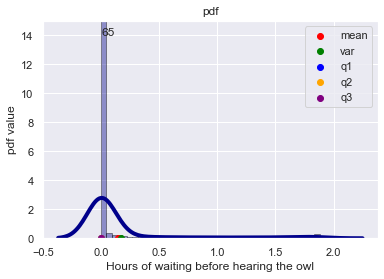

0.17823737485474656


In [8]:
from pprint import  pprint

In [22]:

    
    # hour_start,
    
    # hour_end,
    
    # n_minutes,
    
    
    # minutes,
    # '\n'*10,
    # "hist_values",
    # hist_values,
    # '\n'*10,
    # "pdf_values",
pprint((
    "hour_start",
    hourStart,
    '\n'*10,
    "hour_end",
    hourEnd,
    '\n'*10,
    "n_minutes",
    numMinutes,
    '\n'*10,
    "minutes",
    minutes,
    '\n'*10,
    "hist_values",
    hist_values,
    "pdf_values",
    pdf_values
    # pdf_values
))

('hour_start',
 0,
 '\n\n\n\n\n\n\n\n\n\n',
 'hour_end',
 7,
 '\n\n\n\n\n\n\n\n\n\n',
 'n_minutes',
 420,
 '\n\n\n\n\n\n\n\n\n\n',
 'minutes',
 array([0.        , 0.01670644, 0.03341289, 0.05011933, 0.06682578,
       0.08353222, 0.10023866, 0.11694511, 0.13365155, 0.150358  ,
       0.16706444, 0.18377088, 0.20047733, 0.21718377, 0.23389021,
       0.25059666, 0.2673031 , 0.28400955, 0.30071599, 0.31742243,
       0.33412888, 0.35083532, 0.36754177, 0.38424821, 0.40095465,
       0.4176611 , 0.43436754, 0.45107399, 0.46778043, 0.48448687,
       0.50119332, 0.51789976, 0.53460621, 0.55131265, 0.56801909,
       0.58472554, 0.60143198, 0.61813842, 0.63484487, 0.65155131,
       0.66825776, 0.6849642 , 0.70167064, 0.71837709, 0.73508353,
       0.75178998, 0.76849642, 0.78520286, 0.80190931, 0.81861575,
       0.8353222 , 0.85202864, 0.86873508, 0.88544153, 0.90214797,
       0.91885442, 0.93556086, 0.9522673 , 0.96897375, 0.98568019,
       1.00238663, 1.01909308, 1.03579952, 1.0525059

ValueError: x and y must have same first dimension, but have shapes (420,) and (418,)

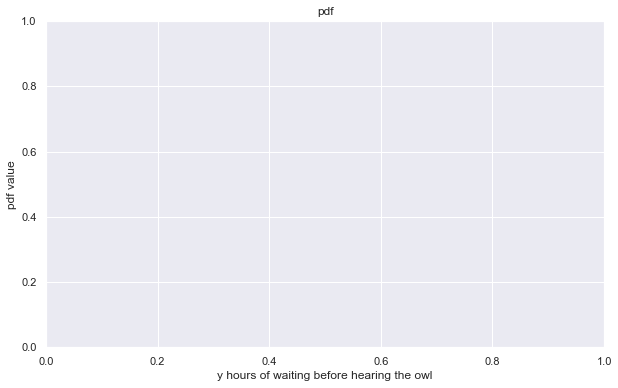

In [27]:

# # Plot the histogram probabilities
# plt.bar(minutes[:numMinutes-1], hist_values, width=0.1, color='blue', label='Histogram Probabilities')
# # Plot the probability density function values
# plt.plot(minutes[1:], pdf_values, color='red', label='Probability Density Function')
# # Set the x-axis label
# plt.xlabel('Minutes')
# # Set the y-axis label
# plt.ylabel('Probability')
# # Set the title
# plt.title('Histogram Probabilities vs. Probability Density Function')
# # Display the legend
# plt.legend()
# # Display the plot
# plt.show()


# # Import seaborn and matplotlib
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set the style and color palette of seaborn
# sns.set_style('whitegrid')
# sns.set_palette('muted')

# # Plot the histogram probabilities using seaborn barplot
# sns.barplot(x=minutes[:numMinutes-1], y=hist_values, color='blue', label='Histogram Probabilities')
# # Plot the probability density function values using matplotlib plot
# plt.plot(minutes[1:], pdf_values, color='red', label='Probability Density Function')
# # Set the x-axis label
# plt.xlabel('Minutes')
# # Set the y-axis label
# plt.ylabel('Probability')
# # Set the title
# plt.title('Histogram Probabilities vs. Probability Density Function')
# # Display the legend
# plt.legend()
# # Display the plot
# plt.show()


# Create a figure for the probability density function plot
plt.figure(figsize=(10,6))
plt.xlabel('y hours of waiting before hearing the owl')
plt.ylabel('pdf value')
plt.title('pdf')
# Plot the probability density function values using a line
plt.plot(minutes, pdf_values, color='black', label='pdf')
# Set the legend location
plt.legend(loc='upper right')

# Display the plot
plt.show()

# Create a figure for the histogram plot
plt.figure(figsize=(10,6))
plt.xlabel('y hours of waiting before hearing the owl')
plt.ylabel('probability')
plt.title('histogram')
# Plot the histogram probabilities using bars
plt.bar(x=[(minutes[i]+minutes[i+1])/2 for i in range(len(minutes)-1)], height=hist_values, width=0.1,
 color='red', edgecolor='black', alpha=0.6, label='histogram')
# Set the legend location
plt.legend(loc='upper right')

# Display the plot
plt.show()

In [18]:

# ```python
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# # import scipy.stats as stats
# import seaborn as sns

# # Define constants for the probability distribution function
# E5 = 41/99
# E6 = 3
# E7 = 58/99
# E8 = 7

# # Define a function that returns the value of the probability distribution function for a given y
# def probabilityDistribution(y):
#  # Use the numpy exp function to calculate the exponential terms
#  return E5 * np.exp(-E6 * (y ** 2)) + (E7 * np.exp(-E8 * (y ** 2)))

# # Calculate the probability of y being between 2 and 4 by subtracting the probabilities of y being less than 2 or greater than 4
# probability_2_4 = 1 - probabilityDistribution(4) - (1 - probabilityDistribution(2))

# # Print the result
# print(probability_2_4)

# # Define a function that returns the value of a probability density function for a given y
# def pdf(y):
#  # Use the numpy exp function to calculate the exponential terms
#  return (((82/33) * y * np.exp(-3 * (y ** 2))) + ((812/99) * y * np.exp(-7 * (y**2))))

# # Define a function that returns the probability of y being between x and y using the probability distribution function
# def histProbabilities(x, y):
#  # Use the complement rule to calculate the probability
#  return 1 - probabilityDistribution(x) - (1 - probabilityDistribution(y))

# # Define the start and end hours of the interval
# hourStart = 0
# hourEnd = 7
# # Define the number of minutes in the interval
# numMinutes = 7 * 60

# # Create an array of minutes from hourStart to hourEnd with numMinutes elements
# minutes = np.linspace(start=hourStart, stop=hourEnd, num=numMinutes)
# # Create an empty list to store the histogram probabilities for each minute interval
# hist_values = []
# # Loop through the minutes array except the last element
# for i in range(len(minutes[:numMinutes-1])):
#  # Append the histogram probability for the current minute interval to the list
#  hist_values.append(histProbabilities(minutes[i], minutes[i+1]))

# # Create an empty list to store the probability density function values for each minute
# pdf_values = []
# # Loop through the minutes array except the first element
# for i in range(len(minutes)-1):
#  # Append the probability density function value for the current minute to the list
#  pdf_values.append(pdf(minutes[i+1]))
# ```

# # the above is the code below is the Task

# # Task 2: Basic Probabilities and Visualizations (2)
# # Let Y be the random variable with the time to hear an owl from your room's open window (in
# # hours). Assume that the probability that you still need to wait to hear the owl after y hours is one
# # of the following:
# # • If is 3: the probability is given by {se-(6Y2+
# # Find the probability that you need to wait between 2 and 4 hours to hear the owl, compute and
# # display the probability density function graph as well as a histogram by the minute. Compute and
# # display in the graphics the mean, variance, and quartiles of the waiting times.


# # Create a figure for the probability density function plot
# p = figure(width=800, height=500,
#  x_axis_label='y hours of waiting before hearing the owl', y_axis_label='pdf value', title='pdf')
# # Plot the probability density function values using a line
# p.line(x=minutes, y=pdf_values, line_alpha=1, line_color = 'black')
# # Set the legend location
# p.legend.location = 'top_right'

# # Display the plot
# show(p)

# # Create a figure for the histogram plot
# p = figure(width=800, height=500,
#  x_axis_label='y hours of waiting before hearing the owl', y_axis_label='probability', title='histogram')
# # Plot the histogram probabilities using quadrilaterals
# p.quad(bottom=0, top=hist_values, left=[minutes[i] for i in range(len(minutes)-1)], right=[minutes[i+1] for i in range(len(minutes)-1)], 
#  fill_color='red', line_color='black', fill_alpha=0.6)
# # Set the legend location
# p.legend.location = 'top_right'

# # Display the plot
# show(p)

# import matplotlib.pyplot as plt
# import matplotlib as mpl
# # import scipy.stats as stats
# import seaborn as sns

# # Define constants for the probability distribution function
# E5 = 41/99
# E6 = 3
# E7 = 58/99
# E8 = 7

# # Define a function that returns the value of the probability distribution function for a given y
# def probabilityDistribution(y):
#  # Use the numpy exp function to calculate the exponential terms
#  return E5 * np.exp(-E6 * (y ** 2)) + (E7 * np.exp(-E8 * (y ** 2)))

# # Calculate the probability of y being between 2 and 4 by subtracting the probabilities of y being less than 2 or greater than 4
# probability_2_4 = 1 - probabilityDistribution(4) - (1 - probabilityDistribution(2))

# # Print the result
# print(probability_2_4)

# # Define a function that returns the value of a probability density function for a given y
# def pdf(y):
#  # Use the numpy exp function to calculate the exponential terms
#  return (((82/33) * y * np.exp(-3 * (y ** 2))) + ((812/99) * y * np.exp(-7 * (y**2))))

# # Define a function that returns the probability of y being between x and y using the probability distribution function
# def histProbabilities(x, y):
#  # Use the complement rule to calculate the probability
#  return 1 - probabilityDistribution(x) - (1 - probabilityDistribution(y))

# # Define the start and end hours of the interval
# hourStart = 0
# hourEnd = 7
# # Define the number of minutes in the interval
# numMinutes = 7 * 60
# # Create an array of minutes from hourStart to hourEnd with numMinutes elements
# minutes = np.linspace(start=hourStart, stop=hourEnd, num=numMinutes)
# # Create an empty list to store the probability density function values for each minute
# pdf_values = []
# # Loop through the minutes array except the first and last elements
# for i in range(1, len(minutes)-1):
#  # Append the probability density function value for the current minute to the list
#  pdf_values.append(pdf(minutes[i]))

SyntaxError: invalid syntax (1364412839.py, line 1)

-7


2.5445731979267805e-06


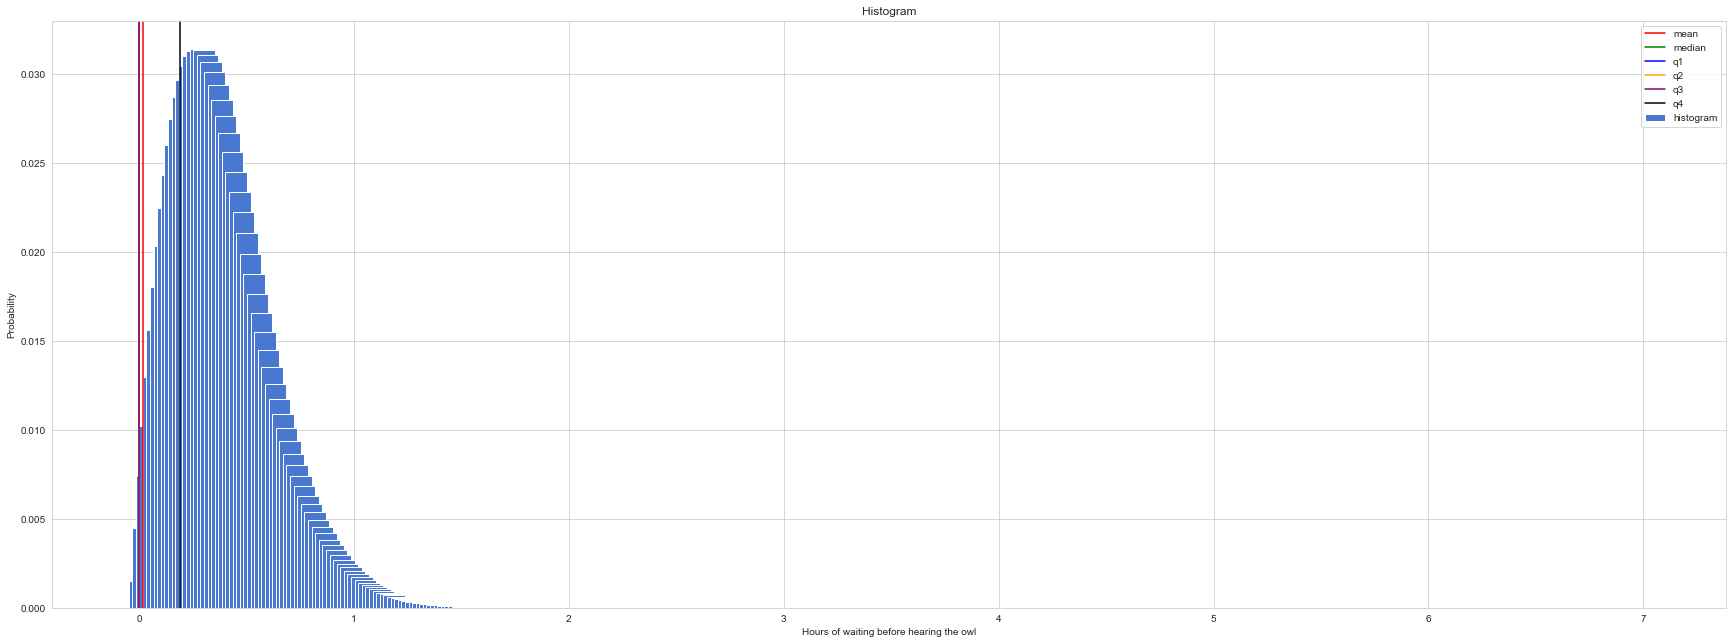

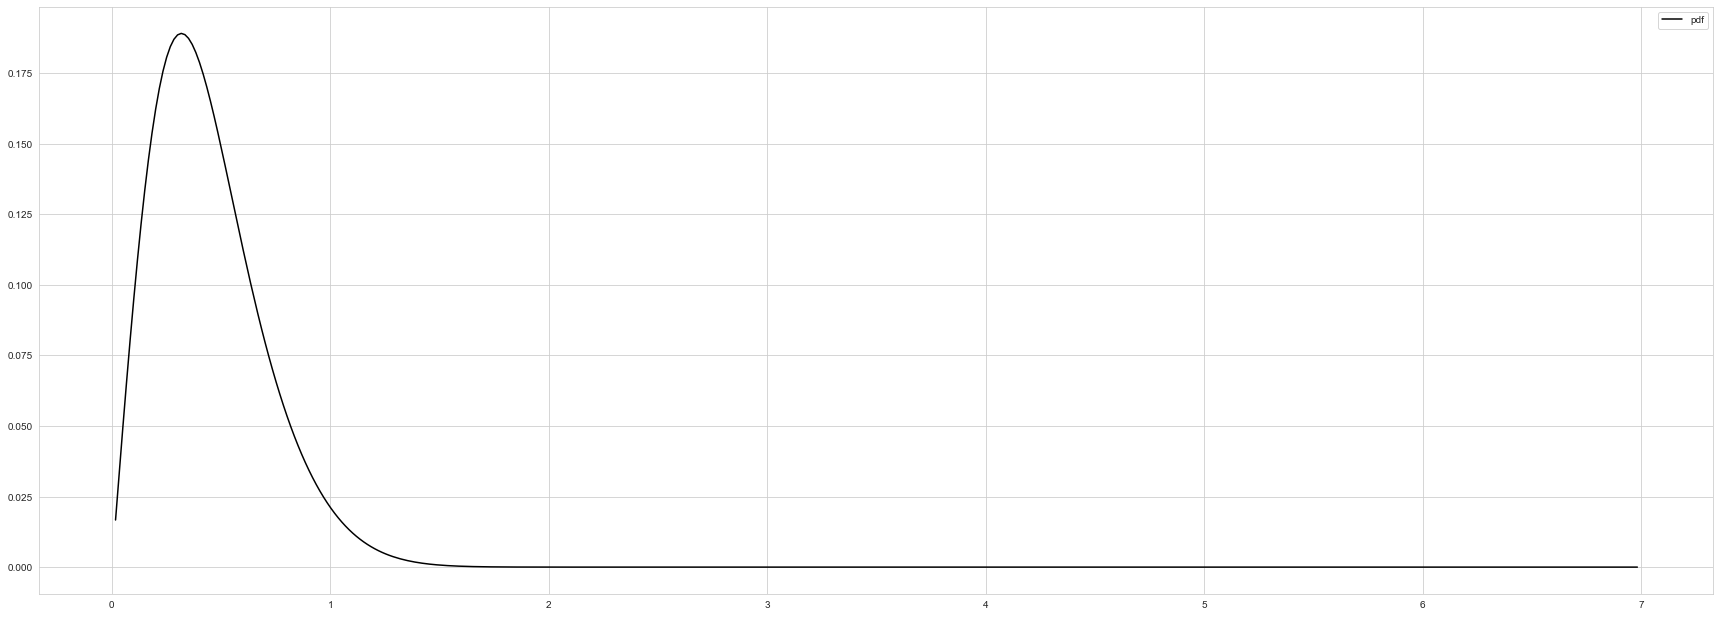

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# import scipy.stats as stats
import seaborn as sns

# Define constants for the probability distribution function
E5 = 41/99
E6 = 3
E7 = 58/99
E8 = 7

# Define a function that returns the value of the probability distribution function for a given y
def probabilityDistribution(y):
 # Use the numpy exp function to calculate the exponential terms
 return (E5 * np.exp(-E6 * (y ** 2))) + (E7 * np.exp(-E8 * (y ** 2)))

# Calculate the probability of y being between 2 and 4 by subtracting the probabilities of y being less than 2 or greater than 4
probability_2_4 = 1 - probabilityDistribution(4) - (1 - probabilityDistribution(2))

# Print the result
print(probability_2_4)

# # Define a function that returns the value of a probability density function for a given y
# def pdf(y):
#     # Use the numpy exp function to calculate the exponential terms
#     return (((41/99) * y * np.exp(-E6 * (y ** 2))) + ((58/99) * y * np.exp(-E8 * (y**2))))

# Define a function that returns the probability of y being between x and y using the probability distribution function
# def histProbabilities(x, y):
    # Use the complement rule to calculate the probability
    # return 1 - probabilityDistribution(x) - (1 - probabilityDistribution(y))


# Define the start and end hours of the interval
hourStart = 0
hourEnd = 7
# Define the number of minutes in the interval
numMinutes = 7 * 60
# Create an array of minutes from hourStart to hourEnd with numMinutes elements
minutes = np.linspace(start=hourStart, stop=hourEnd, num=numMinutes)

hist_values = []
# Loop through the minutes array except the last element
for i in range(len(minutes[:numMinutes-1])):
    # Append the histogram probability for the current minute interval to the list
    hist_values.append(histProbabilities(minutes[i], minutes[i+1]))


# change each hist_values to abs values
for i in range(len(hist_values)):
    hist_values[i] = abs(hist_values[i])


# Create an empty list to store the probability density function values for each minute
pdf_values = []
# Loop through the minutes array except the first and last elements
for i in range(1, len(minutes)-1):
 # Append the probability density function value for the current minute to the list
 pdf_values.append(pdf(minutes[i]))


# # Calculate the mean, var, q1, q2, q3 as points on the pdf_values
# mean = np.mean(pdf_values)
# # var = np.var(pdf_values)
# q1 = np.percentile(pdf_values, 25)
# q2 = np.percentile(pdf_values, 50)
# q3 = np.percentile(pdf_values, 75)

# var = np.var(pdf_values)

pdf_values = np.array(pdf_values)

y = pdf_values

# import numpy as np
variance = np.var(y)


mean = np.mean(y)
median = np.median(y)
q1 = np.quantile(y, 0.25)
q2 = np.quantile(y, 0.5)
q3 = np.quantile(y, 0.75)
q4 = np.quantile(y, 1)

# Import seaborn
import seaborn as sns

# # Set the figure size to match the screen resolution
# plt.rcParams['figure.figsize'] = (30, 10.8) # Changed from (10,6) to (19.2, 10.8)

# # Set the seaborn style and color palette
# sns.set_style('whitegrid')
# sns.set_palette('mako')

# # Create a figure for the histogram plot
# plt.figure()
# plt.xlabel('Hours of waiting before hearing the owl')
# plt.ylabel('Probability')
# plt.title('Histogram')

# # Plot the histogram values using bars
# plt.bar(minutes[:-1], hist_values, width=0.1, label='histogram')

# # Set the legend location
# plt.legend(loc='upper right')

# # Display the plot
# plt.show()

import matplotlib.pyplot as plt
plt.figure()
plt.xlabel('Hours of waiting before hearing the owl')
plt.ylabel('Probability')
plt.title('Histogram')
plt.bar(minutes[:-1], hist_values, width=0.1, label='histogram')
plt.axvline(mean, color='red', label='mean')
plt.axvline(median, color='green', label='median')
plt.axvline(q1, color='blue', label='q1')

plt.axvline(q2, color='orange', label='q2')

plt.axvline(q3, color='purple', label='q3')
plt.axvline(q4, color='black', label='q4')
plt.legend(loc='upper right')
plt.show()

# Import seaborn
import seaborn as sns

# Set the style and color palette
sns.set_style('whitegrid')
sns.set_palette('muted')

# Plot the probability density function values using a line
plt.plot(minutes[1:-1], pdf_values, color='black', label='pdf')

# Set the legend location
plt.legend(loc='upper right')

# Display the plot
plt.show()




In [43]:
# print(mean, median, q1, q2, q3, q4 )
print("mean:", mean, "median:",median,  "q1:",q1, "q2:",q2, "q3:",q3, "q4:",q4)

mean: 0.015873219096093242 median: 1.6116528306439216e-16 q1: 3.564576409804086e-36 q2: 1.6116528306439216e-16 q3: 6.839570341029928e-05 q4: 0.18902466275596014


In [ ]:

# # Create a figure for the histogram plot with a larger size
# plt.figure(figsize=(12,8)) # Changed from (10,6) to (12,8)
# plt.xlabel('Hours of waiting before hearing the owl')
# plt.ylabel('Probability')
# plt.title('Histogram')

# # Plot the histogram values using bars with a larger width
# plt.bar(minutes[:-1], hist_values, width=0.2, color='red', label='histogram') # Changed from 0.1 to 0.2

# # Set the legend location
# plt.legend(loc='upper right')

# # Display the plot
# plt.show()


# # plot the mean, var, q1, q2, q3 of the pdf_values as points
# plt.scatter(mean, 0, color='red', label='mean')
# plt.scatter(var, 0, color='green', label='var')
# plt.scatter(q1, 0, color='blue', label='q1')
# plt.scatter(q2, 0, color='orange', label='q2')
# plt.scatter(q3, 0, color='purple', label='q3')



# # Create a figure for the probability density function plot
# plt.figure(figsize=(10,6))
# plt.xlabel('Hours of waiting before hearing the owl')
# plt.ylabel('pdf value')
# plt.title('pdf')

# # Create a figure for the histogram plot
# plt.figure(figsize=(10,6))
# plt.xlabel('Hours of waiting before hearing the owl')
# plt.ylabel('Probability')
# plt.title('Histogram')

# # Plot the histogram values using bars
# plt.bar(minutes[:-1], hist_values, width=0.1, color='red', label='histogram')

# # Set the legend location
# plt.legend(loc='upper right')

# # Display the plot
# plt.show()



In [17]:
# from pprint import  pprint

# pprint((
#     "hour_start",
#     hourStart,
#     '\n'*10,
#     "hour_end",
#     hourEnd,
#     '\n'*10,
#     "n_minutes",
#     numMinutes,
#     '\n'*10,
#     "minutes",
#     minutes,
#     '\n'*10,
#     "hist_values",
#     hist_values,
#     "pdf_values",
#     pdf_values
#     # pdf_values
# ))

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cbook as cbook

plt.figure(figsize=(10,6))
sns.boxplot(x='survived', y='age', data=df, showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"white", 
                       "markeredgecolor":"black", "markersize":"10"})
plt.ylabel("Age", size=14)
plt.xlabel("Survived", size=14)
plt.title("Titanic Dataset", size=18)

# Get the quartile values for each group using cbook.boxplot_stats
stats = cbook.boxplot_stats(df.age.groupby(df.survived))
# Loop through each group and label the quartiles on the plot
for i in range(len(stats)):
    # Get the quartile values for the current group
    q1 = stats[i]['q1']
    q2 = stats[i]['med']
    q3 = stats[i]['q3']
    # Get the y position for the current group
    y = i + 1 
    # Label the quartiles using text function with horizontal alignment 'center'
    plt.text(q1, y + 0.1 , str(round(q1,1)), fontsize=8, ha='center')
    plt.text(q2, y + 0.1 , str(round(q2,1)), fontsize=8, ha='center')
    plt.text(q3, y + 0.1 , str(round(q3,1)), fontsize=8, ha='center')

# Display the plot
plt.show()


NameError: name 'df' is not defined

<Figure size 720x432 with 0 Axes>

ValueError: x and y must have same first dimension, but have shapes (418,) and (419,)

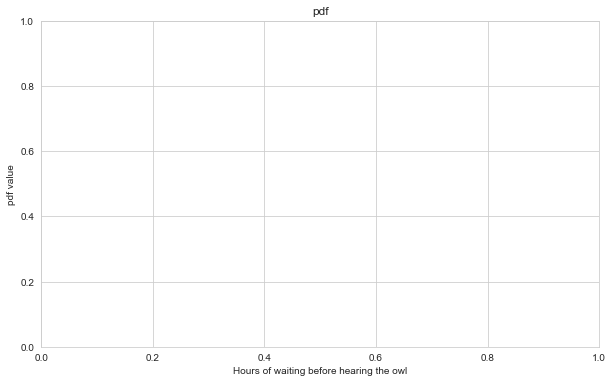

In [35]:
# Create a figure for the probability density function plot
plt.figure(figsize=(10,6))
plt.xlabel('Hours of waiting before hearing the owl')
plt.ylabel('pdf value')
plt.title('pdf')

# Plot the probability density function values using a line
plt.plot(minutes[1:-1], pdf_values, color='black', label='pdf')
# Set the legend location
plt.legend(loc='upper right')

# Display the plot
plt.show()




In [ ]:


# # Create an array of minutes from hourStart to hourEnd with numMinutes elements
# minutes = np.linspace(start=hourStart, stop=hourEnd, num=numMinutes)
# # minutes = minutes[:-1]
# # Create an empty list to store the histogram probabilities for each minute interval
# hist_values = []
# # Loop through the minutes array except the last element
# # for i in range(len(minutes[:numMinutes-1])):
# #  # Append the histogram probability for the current minute interval to the list
# #  hist_values.append(histProbabilities(minutes[i], minutes[i+1]))
# for i in range(1, len(minutes)):
#  # Append the histogram probability for the previous minute interval to the list
#  hist_values.append(histProbabilities(minutes[i-1], minutes[i]))

# # Create an empty list to store the probability density function values for each minute
# pdf_values = []
# # Loop through the minutes array except the first element
# for i in range(len(minutes)-1):
#  # Append the probability density function value for the current minute to the list
#  pdf_values.append(pdf(minutes[i+1]))

# # Create a figure for the probability density function plot
# plt.figure(figsize=(10,6))
# plt.xlabel('y hours of waiting before hearing the owl')
# plt.ylabel('pdf value')
# plt.title('pdf')
# # Plot the probability density function values using a line
# plt.plot(minutes, pdf_values, color='black', label='pdf')
# # Set the legend location
# plt.legend(loc='upper right')

# # Display the plot
# plt.show()

# # Create a figure for the histogram plot
# plt.figure(figsize=(10,6))
# plt.xlabel('y hours of waiting before hearing the owl')
# plt.ylabel('probability')
# plt.title('histogram')
# # Plot the histogram probabilities using bars
# plt.bar(x=[(minutes[i]+minutes[i+1])/2 for i in range(len(minutes)-1)], height=hist_values, width=0.1,
#  color='red', edgecolor='black', alpha=0.6, label='histogram')
# # Set the legend location
# plt.legend(loc='upper right')

# # Display the plot
# plt.show()